[Retour au sommaire](../index.ipynb)

# TP jeu 2048

Le jeu 2048 est un jeu de type puzzle, publié en mars 2014 sous license libre sur Github. Plus d'informations sur [Wikipedia](https://fr.wikipedia.org/wiki/2048_(jeu_vid%C3%A9o)).

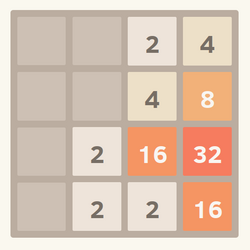

Voici [une version en ligne](https://framagames.org/2048originel/index.html).

## Installation du jeu

A faire

## Interface du jeu

J'ai fait le choix de n'avoir que **deux fonctions** pour l'**interface** de ce jeu :

- *nouvelle_partie()* qui retourne :
  - un plateau rempli de 0 sauf 2 tuiles à 2
  - un score de 0.
- *jouer_coup(plateau, direction)* qui retourne:
  - le nouveau plateau
  - le nombre de points marqués
  - si la partie est finie ou non

Avant que ces deux fonctions soient opérationnelles il va falloir créer des fonctions **privées**, elles sont utilisées pour le fonctionnement **interne** qui ne concerne pas les utilisateurs de votre programme. En Python, par convention, ce type de fonction commence par un underscore.

Il y a beaucoup fonctions à tester, documenter, écrire:

```
PROJET 2048
|
├── 1. INITIALISATION
│   ├── _creer_plateau_vide() -> plateau
│   ├── _get_cases_vides(plateau) -> list[tuple]
│   ├── _ajouter_tuile(plateau) -> plateau
│   └── nouvelle_partie() -> plateau vide sauf deux tuiles, score à 0
|
├── 2. LOGIQUE LIGNE
│   ├── _supprimer_zeros(ligne) -> ligne
│   ├── _fusionner(ligne) -> ligne, score_ligne
│   └── _completer_zeros(ligne) -> ligne
|
├── 3. MOTEUR 2D
│   ├── _deplacer_gauche(plateau) -> plateau, score_mouvement
│   ├── _inverser_lignes(plateau) -> plateau
│   ├── _deplacer_droite(plateau) -> plateau, score_mouvement
│   ├── _transposer(plateau) / _inverser_lignes(plateau)
│   └── _deplacer_haut/bas -> plateau, score_mouvement
|
└── 4. CHEF D'ORCHESTRE
    ├── _partie_terminee(plateau) -> bool
    └──jouer_coup(plateau, direction, points_du_coup) -> plateau, fini, nouveau_score
     
```



## 1 INITIALISATION

### Création d'un plateau vide

- Première mission : Vous devez implémeter, dans le module *_2048*, la fonction privée *_creer_plateau_vide*, qui créé une matrice TAILLE x TAILLE remplie de zéros.
- Ouvrez le fichier *test_2048.py*. La fonction *test__creer_plateau_vide* a pour but de vérifier que *_creer_plateau_vide* fonctionne correctement.
- Executer *test_2048*, si *_creer_plateau_vide* fonctionne correctement vous devriez voir ceci:

```
test_2048.py
----> Tests de _creer_plateau_vide...
OK

```

- On prend une "photo git" de notre projet:

```
git add _2048.py
git commit -m "implémentation de _creer_plateau_vide -> OK"
```



### Recherche des cases vides dans le plateau

- Deuxiéme mission : Implémentez la fonction *_get_cases_vides* qui prend en paramètre un *plateau* et retourne la liste des coordonnées des cases vides.
- Executer test_2048, si *_get_cases_vides* fonctionne correctement vous devriez voir ceci:

```
test_2048.py
----> Tests de _creer_plateau_vide...
OK
----> Tests de _get_cases_vides...
OK
```
- On prend une "photo git" de notre projet:

```
git add _2048.py
git commit -m "implémentation de _get_cases_vides -> OK"
```

<div class="alert alert-info">
    Je ne vais pas répéter à chaque fonction ce qu'il faut faire : Quand vous avez codé votre fonction et que les tests passent : on fait un commit
</div>


### Ajout d'une nouvelle tuile

Vous devez implémenter la fonction privée *_ajouter_tuile* qui prend en paramètre un *plateau* et retourne un **nouveau plateau** avec une tuile ajoutée.

Des tests sont déjà écrits pour tester votre fonction.

**Remarques**:

- Dans le jeu original la nouvelle tuile vaut 2 90% du temps et 4 10% du temps, par souci de simplification notre nouvelle tuile vaudra toujours 2.
- Vous remarquerez l'**annotation** *plateau: List[List[int]]* qui permet de typer le paramètre *plateau*  ainsi que *-> List[List[int]]* qui permet de spécifier le type retourné par la fonction.
- la fonction doit retourner un nouveau plateau, elle ne doit pas modifier le plateau entré en paramètre. 

## Création d'une nouvelle partie

Nous allons maintenant pouvoir créer notre première **fonction publique** qui fait partie de **l'interface** du jeu. Il s'agit de la fonction *nouvelle_partie* qui ne prend aucun paramètre et retourne 
 - une *grille* TAILLE x TAILLE disposant de 2 tuiles de valeur 2, les autres à 0
 - *score* qui vaut 0

Comme d'habitude, **vérifiez que vos tests fonctionnent** avant de continuer le TP et N'OUBLIEZ PAS DE COMMITER.

Executez le fichier cli_2048.py, une partie de 4x4 devrait s'afficher.

<div class="alert alert-info">
cli = <b>c</b>ommand <b>l</b>ine <b>i</b>nterface (interface en ligne de commande)
</div>

```
SCORE : 0

.       .       2
.       .       .
.       2       .

Commandes :
  g = gauche | d = droite | h = haut | b = bas | q = quitter
Votre choix : 

```


## 2 LOGIQUE LIGNE

Dans cette partie nous allons étudier la logique **sur une ligne** de notre plateau.

### Suppression des zéros d'une ligne

Imaginez les lignes suivantes:

- 2-2-0-0
- 2-0-2-0
- 2-0-0-2

Quelque soit la ligne:

- le résultat d'un déplacement à gauche donnera le même résultat à savoir 4-0-0-0.
- Un déplacement à droite donnerait le résultat 0-0-0-4.

**Les 0 n'ont aucune influence sur le résultat final**.

Nous allons donc implémenter la fonction *_supprimer_zeros* qui prend en paramètre une ligne (une liste) et retourne une **nouvelle liste** mais **sans les zéros**.


<div class="alert alert-info">
AVANT de coder la fonction, nous allons écrire les tests qui doivent vérifier le comportement attendu. Ce type de développement s'appelle <b>Le dev conduit par les tests</b>.
</div>


- Dans le module *test_2048*, **ajoutez vos propres tests** pour cette fonction; (Je ne vais pas tout faire...)
- Implémentez votre fonction.
- **Quand tous vos tests sont OK, on commit puis on passe à la suite**.


### Fusion des valeurs d'une ligne

Maintenant que nous avons une ligne débarassée de ses zéros, il est maintenant temps de passer à la **fusion**.

La fonction *_fusionner* prend en paramètre une *ligne* et retourne :

- La liste fusionnée
- Les points gagnés lors de cette fusion 

Ici nous allons fusionner les valeurs égales en parcourant la ligne de gauche à droite, comme si le déplacement s'était fait à gauche.

Des tests sont déjà présents dans le module test_2048.

Cette fonction est assez complexe à écrire, voici donc l'algorithme en pseudo-code.

```
fonction _fusionner(ligne: liste) -> liste, int

    fusion <- liste vide
    i <- 0 (sert d'index)
    points <- 0
    Tant que i est strictement inférieur à la longeur de ligne
        # Pour fusionner il ne faut pas se trouver à la derniere case ET que cette case soit égale à la suivante
        Si l'index suivant (i+1) existe et que la case courante est égale à la case suivante alors 
            points <- points + ligne[i] + ligne[i+1] # Il peut y avoir plus d'une fusion par ligne d'où le +=
            fusion[i] <- ligne[i] + ligne[i+1]
            i <- i + 2 # on saute deux cases
        sinon
            Ajouter(fusion, ligne[i])
            i <- i +1 # on saute une case
        Fin de Si
    Fin Tant que
    retourner fusion, points 
```

- Implémentez votre fonction *_fusionner*.
- Quand tous vos tests sont OK, on commit et on passe à la suite.


### Compléter par des zéros

Considérons un  déplacement par la gauche d'une ligne

```
2-0-2-8 ---suppression des zeros---> 2-2-8 ---fusion---> 4-8
```
Il ne reste plus qu'à **compléter les zéros manquants** dans cette ligne et nous aurons obtenu une ligne correcte pour un déplacement à gauche.

```
 ---ajout zéros ---> 4-8-0-0
```


- Ajouter les **docstrings**
- Ecrire les tests
- Implémenter la fonction

Vous devriez savoir quoi faire avant de passer à la suite.

### Déplacer gauche

Le jeu peut commencer!!! mais seulement en jouant à gauche :-(

On va s'attaquer à la fonction *_deplacer_gauche* qui prend en paramètre un plateau et retourne :
- un nouveau plateau après le déplacement à gauche.
- les points gagnés sur ce coup

Voici le pseudo-code:

```
fonction _deplacer_gauche(plateau):
    nouveau_plateau <- liste vide
    nouveaux_points <- 0
    pour chaque ligne du plateau:
        ligne_sans_zeros <- _supprimer_zeros(plateau)
        ligne_fusionnee, points <- _fusionner_ligne(ligne_sans_zeros)
        nouveaux_points <- nouveaux_points + points
        ligne_finale <- _completer_zeros(ligne_fusionnee)
        ajouter(nouveau_plateau, ligne_finale)
    retourner nouveau_plateau, nouveaux_points
```

- Les tests sont déjà écrits
- Ajoutez les **docstrings**;
- **Implémenter** la fonction.

Dès que vos tests passent, vous savez ce que vous avez à faire.

vous pouvez executer le module *cli_2048* et uniquement jouer **à gauche**...

Ne reste plus qu'à jouer dans les **3 autres directions** et à détecter **la fin de la partie**.



Afin de réaliser les autres déplacements nous allons opérer des **transformations** sur notre grille.

### Déplacement à droite ↦.

Prenons cette grille et regardons l'effet que produit un déplacement à droite.
<table>
    <tr>
        <td>
<table>
<tr><td>2</td><td>0</td><td>2</td><td>4</td></tr>
<tr><td>2</td><td>2</td><td>0</td><td>0</td></tr>
<tr><td>0</td><td>0</td><td>4</td><td>4</td></tr>
<tr><td>0</td><td>4</td><td>2</td><td>0</td></tr>
</table>
        </td>
        <td>
---- déplacement à droite --->
        </td>
        <td>
<table>
<tr><td>0</td><td>0</td><td>4</td><td>4</td></tr>
<tr><td>0</td><td>0</td><td>0</td><td>4</td></tr>
<tr><td>0</td><td>0</td><td>0</td><td>8</td></tr>
<tr><td>0</td><td>0</td><td>4</td><td>2</td></tr>
</table>
        </td>
    </tr>
</table>

Jouer à droite c'est comme jouer à gauche devant un **miroir**.

<table>
    <tr>
        <td>
<table>
<tr><td>2</td><td>0</td><td>2</td><td>4</td></tr>
<tr><td>2</td><td>2</td><td>0</td><td>0</td></tr>
<tr><td>0</td><td>0</td><td>4</td><td>4</td></tr>
<tr><td>0</td><td>4</td><td>2</td><td>0</td></tr>
</table>
        </td>
        <td>
inversion des lignes<br>
            ⇿
        </td>
        <td>
<table>
<tr><td>4</td><td>2</td><td>0</td><td>2</td></tr>
<tr><td>0</td><td>0</td><td>2</td><td>2</td></tr>
<tr><td>4</td><td>4</td><td>0</td><td>0</td></tr>
<tr><td>0</td><td>2</td><td>4</td><td>0</td></tr>
</table>
        </td>
        <td>
⇦ déplacement à gauche
        </td>
        <td>
<table>
<tr><td>4</td><td>4</td><td>0</td><td>0</td></tr>
<tr><td>4</td><td>0</td><td>0</td><td>0</td></tr>
<tr><td>8</td><td>0</td><td>0</td><td>0</td></tr>
<tr><td>2</td><td>4</td><td>0</td><td>0</td></tr>
</table>
        </td>
        <td>
inversion des lignes<br>
            ⇿
        </td>
        <td>
<table>
<tr><td>0</td><td>0</td><td>4</td><td>4</td></tr>
<tr><td>0</td><td>0</td><td>0</td><td>4</td></tr>
<tr><td>0</td><td>0</td><td>0</td><td>8</td></tr>
<tr><td>0</td><td>0</td><td>4</td><td>2</td></tr>
</table>
        </td>
    </tr>
</table>

Il vous reste donc à implémenter la fonction *_inverser_lignes* qui prend en paramètre un *plateau* et retourne le nouveau *plateau* dont les lignes sont inversées.

- Ajoutez les docstrings
- Ajoutez des tests dans la fonction test__inverser_lignes()
- Implémentez la fonction

Que fait-on quand les tests passent ?

Ensuite 

- Implémentez la fonction *_deplacer_droite(plateau)*
- Quand vos tests passent, faites un test du jeu avec le fichier cli_2048 en vérifiant la possibilité de jouer à gauche et à **droite**.

### Déplacement en haut ↥.

Reprenons la même grille et regardons l'effet que produit un déplacement en **haut**.
<table>
    <tr>
        <td>
<table>
<tr><td>2</td><td>0</td><td>2</td><td>4</td></tr>
<tr><td>2</td><td>2</td><td>0</td><td>0</td></tr>
<tr><td>0</td><td>0</td><td>4</td><td>4</td></tr>
<tr><td>0</td><td>4</td><td>2</td><td>0</td></tr>
</table>
        </td>
        <td>
---- déplacement en haut ↥ --->
        </td>
        <td>
<table>
<tr><td>4</td><td>2</td><td>2</td><td>8</td></tr>
<tr><td>0</td><td>4</td><td>4</td><td>0</td></tr>
<tr><td>0</td><td>0</td><td>2</td><td>0</td></tr>
<tr><td>0</td><td>0</td><td>0</td><td>0</td></tr>
</table>
        </td>
    </tr>
</table>

Jouer en haut revient à jouer à gauche en ayant **inversé les lignes et les colonnes** :

<table>
    <tr>
        <td>
<table>
<tr><td><b>2</b></td><td><b>0</b></td><td><b>2</b></td><td><b>4</b></td></tr>
<tr><td>2</td><td>2</td><td>0</td><td>0</td></tr>
<tr><td>0</td><td>0</td><td>4</td><td>4</td></tr>
<tr><td>0</td><td>4</td><td>2</td><td>0</td></tr>
</table>
        </td>
        <td>
inversion des lignes et des colonnes
        </td>
        <td>
<table>
<tr><td><b>2</b></td><td>2</td><td>0</td><td>0</td></tr>
<tr><td><b>0</b></td><td>2</td><td>0</td><td>4</td></tr>
<tr><td><b>2</b></td><td>0</td><td>4</td><td>2</td></tr>
<tr><td><b>4</b></td><td>0</td><td>4</td><td>0</td></tr>
</table>
        </td>
        <td>
⇦ déplacement à gauche
        </td>
        <td>
<table>
<tr><td>4</td><td>0</td><td>0</td><td>0</td></tr>
<tr><td>2</td><td>4</td><td>0</td><td>0</td></tr>
<tr><td>2</td><td>4</td><td>2</td><td>0</td></tr>
<tr><td>8</td><td>0</td><td>0</td><td>0</td></tr>
</table>
        </td>
        <td>
inversion des lignes et des colonnes
        </td>
        <td>
<table>
<tr><td>4</td><td>2</td><td>2</td><td>8</td></tr>
<tr><td>0</td><td>4</td><td>4</td><td>0</td></tr>
<tr><td>0</td><td>0</td><td>2</td><td>0</td></tr>
<tr><td>0</td><td>0</td><td>0</td><td>0</td></tr>
</table>
        </td>
    </tr>
</table>

Inverser les lignes et les colonnes dans une grille (ou **matrice** en mathématiques) s'appelle faire la **transposée** de la grille.

Le principe est fort simple : **le contenu de la case de coordonnées (i,j) doit se retrouver dans la case (j,i) de la transposée**.

Il vous reste donc à implémenter la fonction *_transposer*

- Ajoutez les docstrings
- Ajoutez des tests dans la fonction test___transposer()
- Implémentez la fonction

Ensuite 

- Implémentez la fonction *_deplacer_haut(plateau)* avec ses tests...
- Quand vos tests passent, faites un test du jeu avec le fichier cli_2048 en vérifiant la possibilité de jouer à gauche et à droite et **en haut**.

### Déplacement en bas ↧.

Le déplacement en bas c'est:
- une transposé
- un déplacement à **droite**
- une transposé

Faites ce que vous avez à faire...


[Retour au sommaire](../index.ipynb)